# 📊 Dataset Information

**Note:** The dataset for this project is **not included in this repository** to keep the repository lightweight.  

You can download the dataset from **Kaggle** using the link below:  

[Download the Instax Sales Transaction Dataset](https://www.kaggle.com/datasets/bertnardomariouskono/fujifilm-instax-sales-transaction-data-synthetic/data)  

Please make sure to place the downloaded CSV file in the same directory as this notebook before running any code.

# Importing

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

/kaggle/input/fujifilm-instax-sales-transaction-data-synthetic/instax_sales_transaction_data.csv


## Import CSV And convert to DataFrame

In [2]:
df = pd.read_csv('instax_sales_transaction_data.csv')

# Preprocessing

## Frist five row

In [3]:
df.head()

,Tanggal,Tahun,Bulan,Hari,Kategori,Nama_Produk,Lokasi_Toko,Metode_Bayar,Harga_Satuan,Qty,Diskon_IDR,Total_Penjualan
0,2022-05-01,2022,5,Sunday,Film,Instax Mini Film (20s),Tokopedia Official,Kartu Kredit,185000,1,9250,175750
1,2022-05-01,2022,5,Sunday,Film,Instax Mini Film (20s),Tokopedia Official,Kartu Kredit,185000,1,0,185000
2,2022-05-01,2022,5,Sunday,Film,Instax Mini Film (20s),Shopee Mall,E-Wallet (Gopay/OVO),185000,2,0,370000
3,2022-05-01,2022,5,Sunday,Kamera,Instax Mini 11,Shopee Mall,Paylater,1100000,1,0,1100000
4,2022-05-01,2022,5,Sunday,Film,Instax Mini Film (20s),Shopee Mall,E-Wallet (Gopay/OVO),185000,2,0,370000


## last Five row

In [4]:
df.tail()

,Tanggal,Tahun,Bulan,Hari,Kategori,Nama_Produk,Lokasi_Toko,Metode_Bayar,Harga_Satuan,Qty,Diskon_IDR,Total_Penjualan
12329,2025-05-01,2025,5,Thursday,Kamera,Instax Wide 300,Website,E-Wallet (Gopay/OVO),1800000,1,0,1800000
12330,2025-05-01,2025,5,Thursday,Film,Instax Mini Film (10s),Tokopedia Official,Kartu Kredit,95000,2,0,190000
12331,2025-05-01,2025,5,Thursday,Film,Instax Mini Film (10s),Tokopedia Official,Kartu Kredit,95000,1,0,95000
12332,2025-05-01,2025,5,Thursday,Film,Instax Mini Film (10s),Jakarta Official Store,Transfer Bank,95000,2,0,190000
12333,2025-05-01,2025,5,Thursday,Aksesoris,Instax Photo Album,Tokopedia Official,Paylater,75000,1,0,75000


## Shape of our dataset

In [5]:
df.shape

(12334, 12)

## List out all columns

In [6]:
df.columns

Index(['Tanggal', 'Tahun', 'Bulan', 'Hari', 'Kategori', 'Nama_Produk',
       'Lokasi_Toko', 'Metode_Bayar', 'Harga_Satuan', 'Qty', 'Diskon_IDR',
       'Total_Penjualan'],
      dtype='object')

## Datatype of each columns

In [7]:
df.dtypes

Tanggal            object
Tahun               int64
Bulan               int64
Hari               object
Kategori           object
Nama_Produk        object
Lokasi_Toko        object
Metode_Bayar       object
Harga_Satuan        int64
Qty                 int64
Diskon_IDR          int64
Total_Penjualan     int64
dtype: object

## Information of all Columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12334 entries, 0 to 12333
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Tanggal          12334 non-null  object
 1   Tahun            12334 non-null  int64 
 2   Bulan            12334 non-null  int64 
 3   Hari             12334 non-null  object
 4   Kategori         12334 non-null  object
 5   Nama_Produk      12334 non-null  object
 6   Lokasi_Toko      12334 non-null  object
 7   Metode_Bayar     12334 non-null  object
 8   Harga_Satuan     12334 non-null  int64 
 9   Qty              12334 non-null  int64 
 10  Diskon_IDR       12334 non-null  int64 
 11  Total_Penjualan  12334 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 1.1+ MB


## Check Null Value

In [9]:
df.isnull().sum()

Tanggal            0
Tahun              0
Bulan              0
Hari               0
Kategori           0
Nama_Produk        0
Lokasi_Toko        0
Metode_Bayar       0
Harga_Satuan       0
Qty                0
Diskon_IDR         0
Total_Penjualan    0
dtype: int64

## Check Dupicate Value

In [10]:
df.duplicated().sum()

np.int64(129)

## Drop Duplicated Value

In [11]:
df.drop_duplicates(inplace=True)

## Summary

In [12]:
df.describe()

,Tahun,Bulan,Harga_Satuan,Qty,Diskon_IDR,Total_Penjualan
count,12205.000000,12205.000000,1.220500e+04,12205.000000,1.220500e+04,1.220500e+04
mean,2023.483245,6.793445,3.992397e+05,1.944941,1.292458e+04,5.215125e+05
std,0.927732,3.870447,6.916176e+05,1.153600,4.619824e+04,7.038178e+05
min,2022.000000,1.000000,5.000000e+04,1.000000,0.000000e+00,4.000000e+04
25%,2023.000000,3.000000,9.500000e+04,1.000000,0.000000e+00,1.500000e+05
50%,2024.000000,7.000000,1.500000e+05,2.000000,0.000000e+00,2.707500e+05
75%,2024.000000,10.000000,1.850000e+05,3.000000,7.500000e+03,5.272500e+05
max,2025.000000,12.000000,2.900000e+06,5.000000,1.160000e+06,5.800000e+06


# EDA

In [13]:
def show_fig():
    plt.tight_layout()
    plt.show()

plot_no = 1

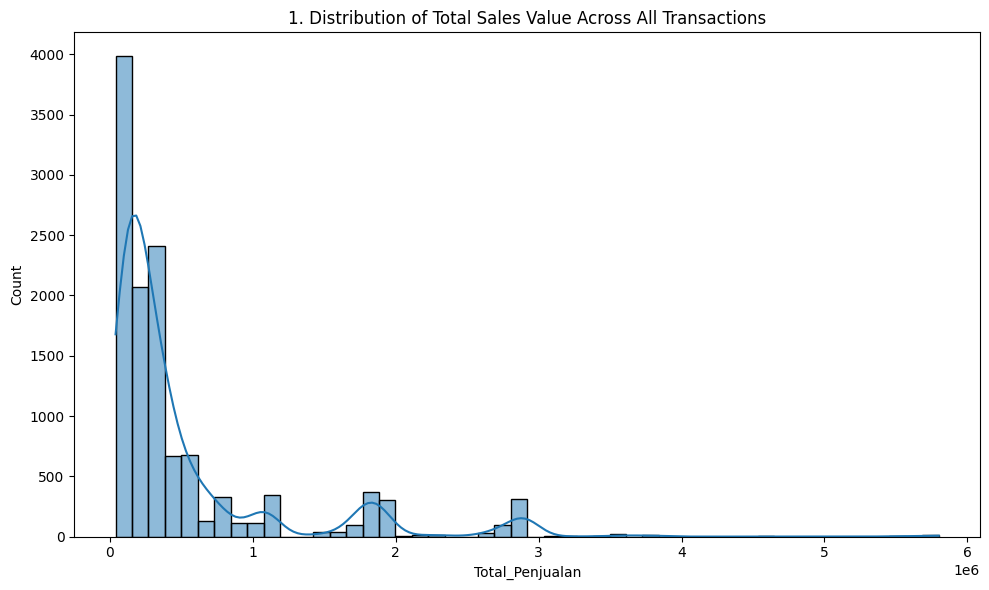

In [14]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['Total_Penjualan'], bins=50, kde=True)
plt.title(f'{plot_no}. Distribution of Total Sales Value Across All Transactions')
show_fig()
plot_no += 1


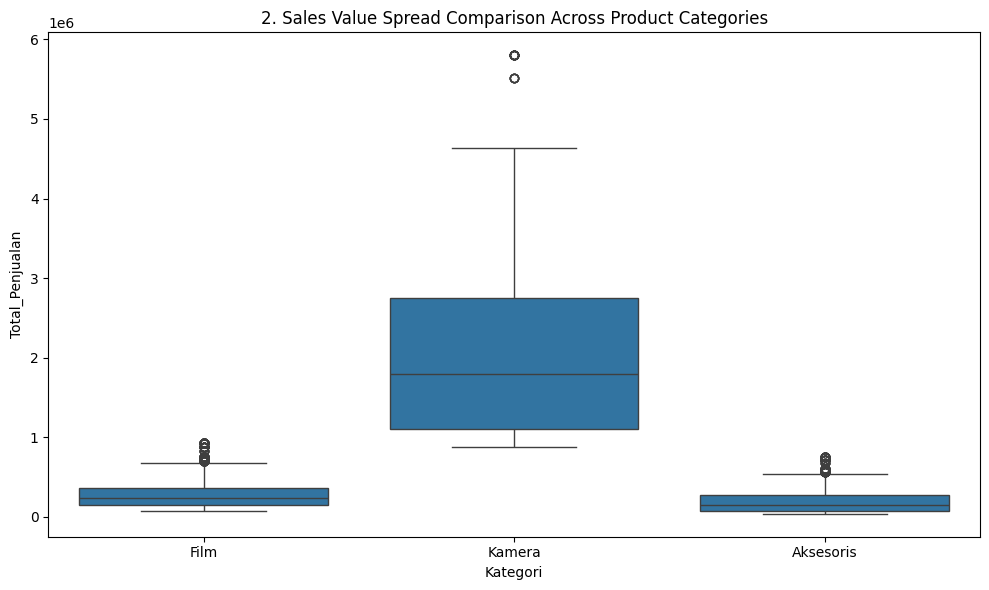

In [15]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='Kategori', y='Total_Penjualan', data=df)
plt.title(f'{plot_no}. Sales Value Spread Comparison Across Product Categories')
show_fig()
plot_no += 1


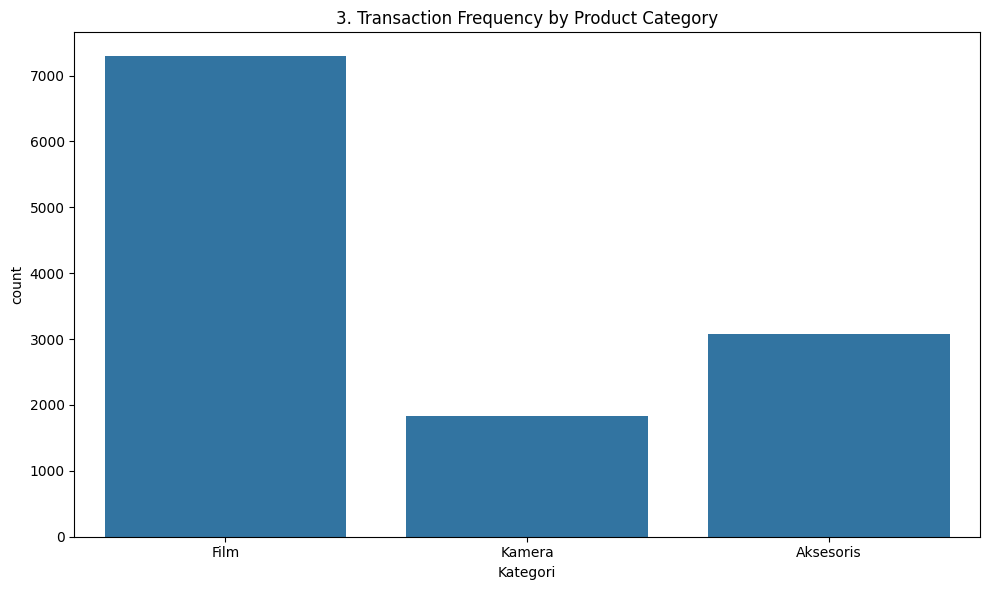

In [16]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='Kategori', data=df)
plt.title(f'{plot_no}. Transaction Frequency by Product Category')
show_fig()
plot_no += 1


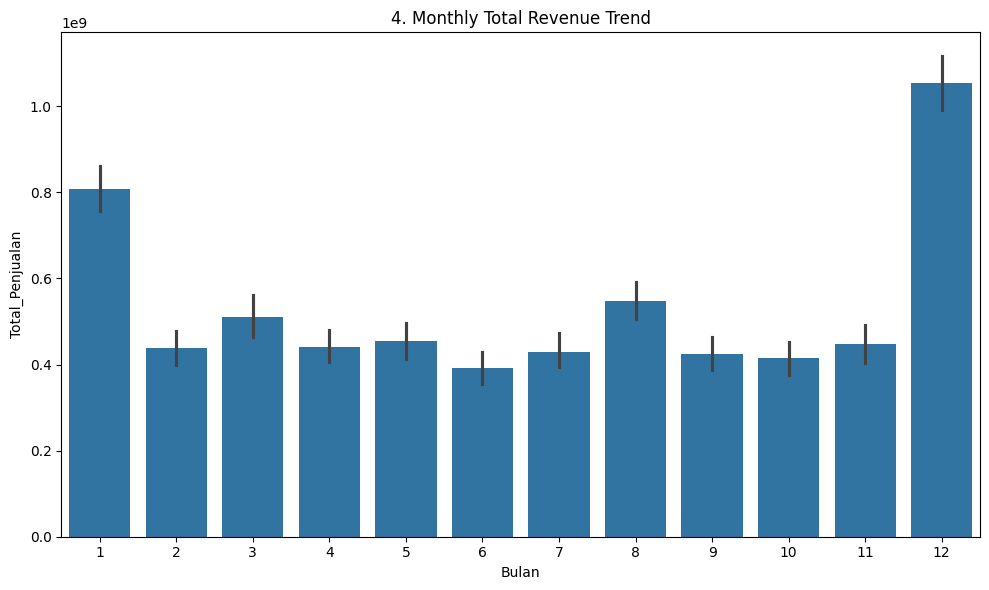

In [17]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='Bulan', y='Total_Penjualan', data=df, estimator=sum)
plt.title(f'{plot_no}. Monthly Total Revenue Trend')
show_fig()
plot_no += 1


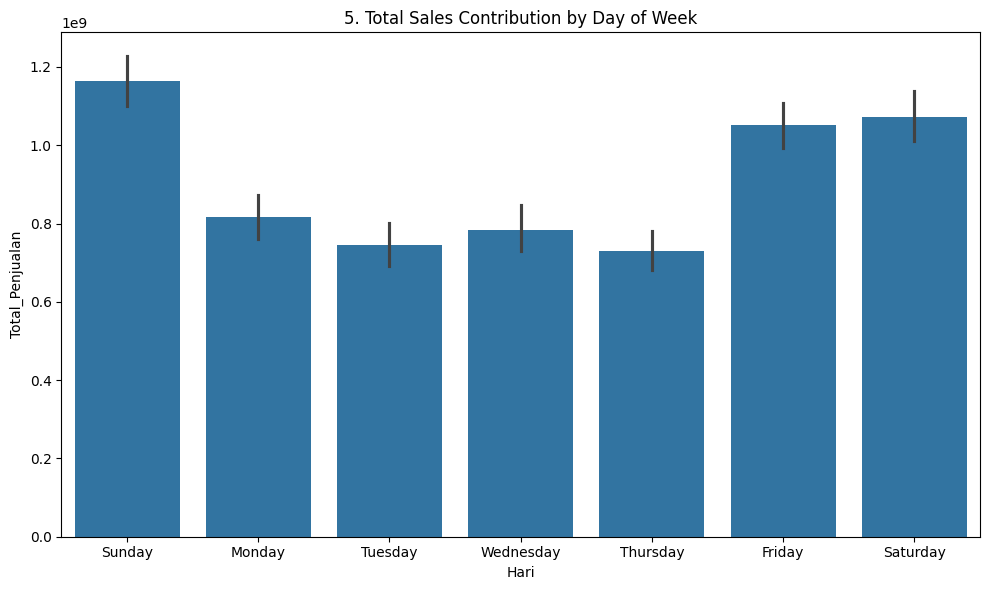

In [18]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='Hari', y='Total_Penjualan', data=df, estimator=sum)
plt.title(f'{plot_no}. Total Sales Contribution by Day of Week')
show_fig()
plot_no += 1


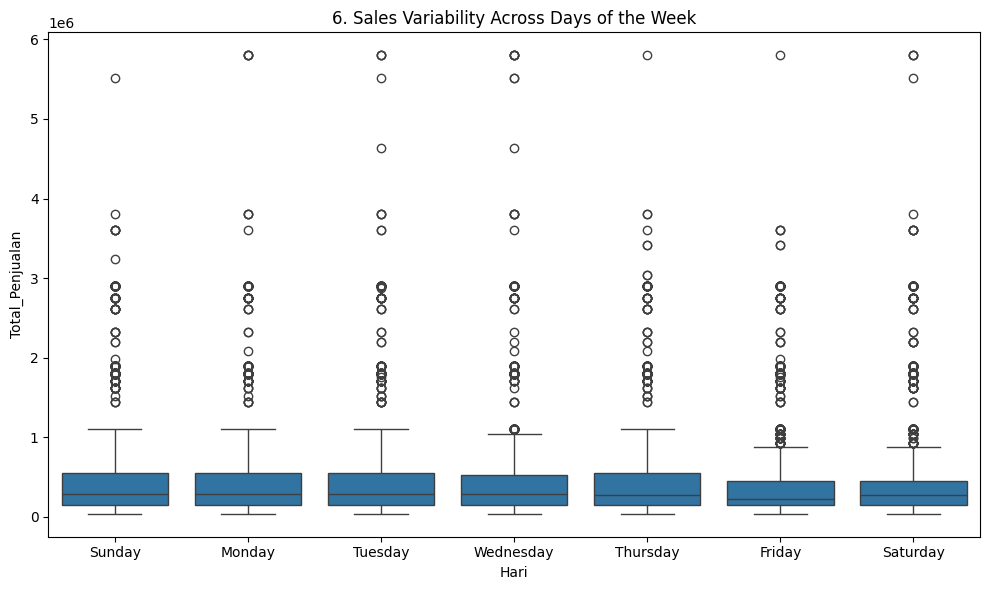

In [19]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='Hari', y='Total_Penjualan', data=df)
plt.title(f'{plot_no}. Sales Variability Across Days of the Week')
show_fig()
plot_no += 1


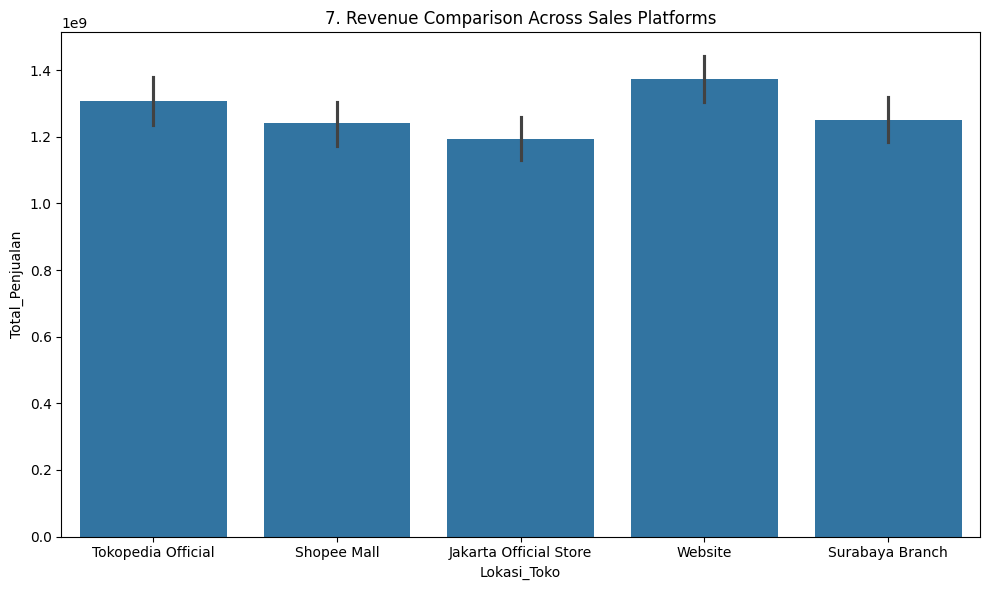

In [20]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='Lokasi_Toko', y='Total_Penjualan', data=df, estimator=sum)
plt.title(f'{plot_no}. Revenue Comparison Across Sales Platforms')
show_fig()
plot_no += 1


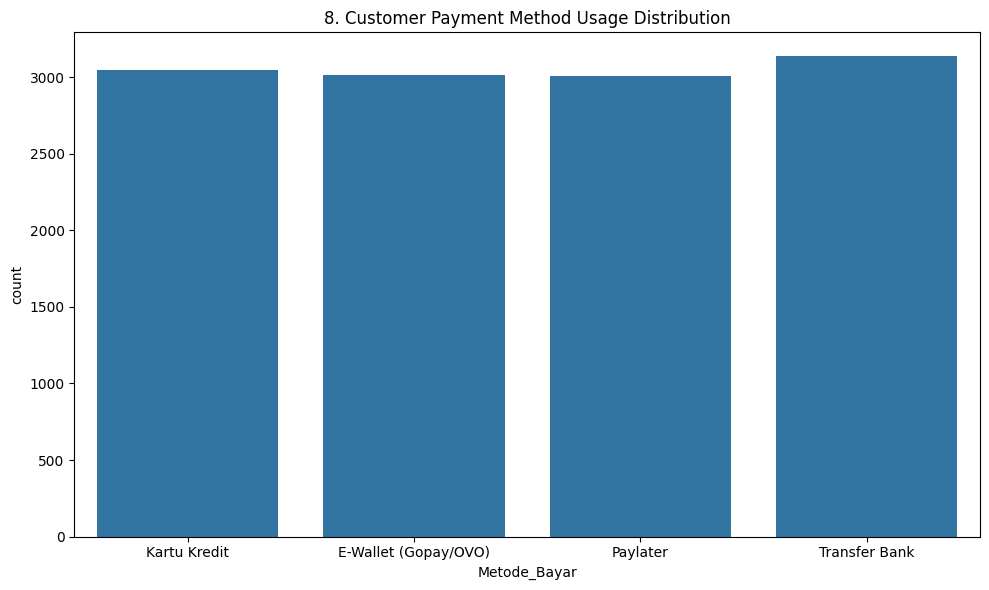

In [21]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='Metode_Bayar', data=df)
plt.title(f'{plot_no}. Customer Payment Method Usage Distribution')
show_fig()
plot_no += 1


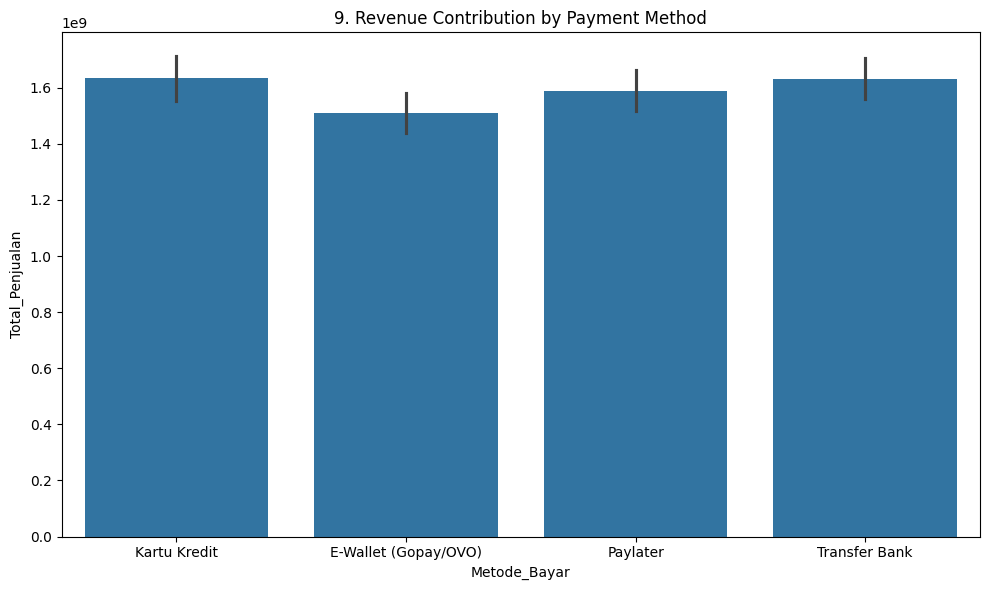

In [22]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='Metode_Bayar', y='Total_Penjualan', data=df, estimator=sum)
plt.title(f'{plot_no}. Revenue Contribution by Payment Method')
show_fig()
plot_no += 1


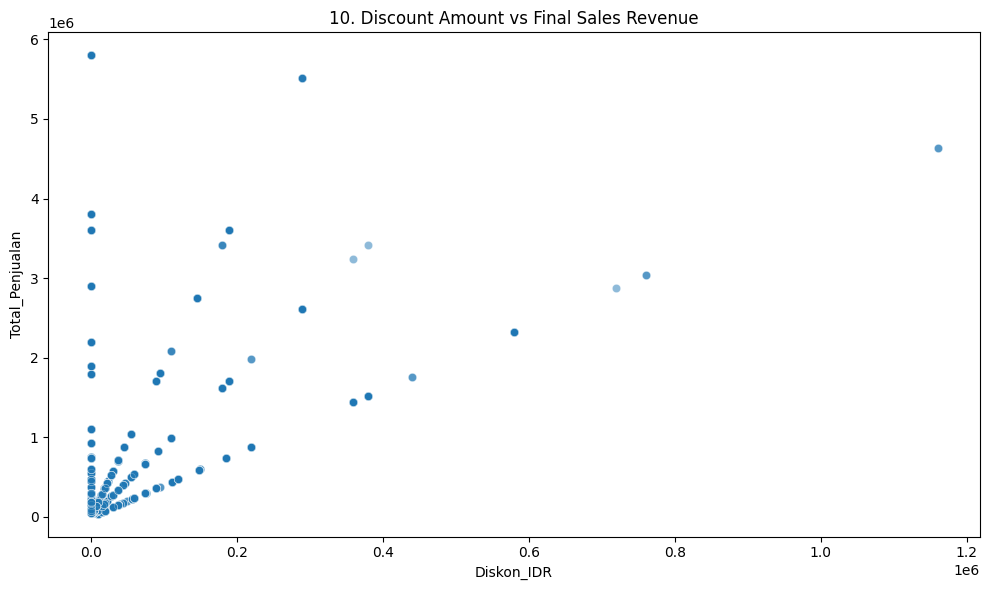

In [23]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x='Diskon_IDR', y='Total_Penjualan', data=df, alpha=0.5)
plt.title(f'{plot_no}. Discount Amount vs Final Sales Revenue')
show_fig()
plot_no += 1


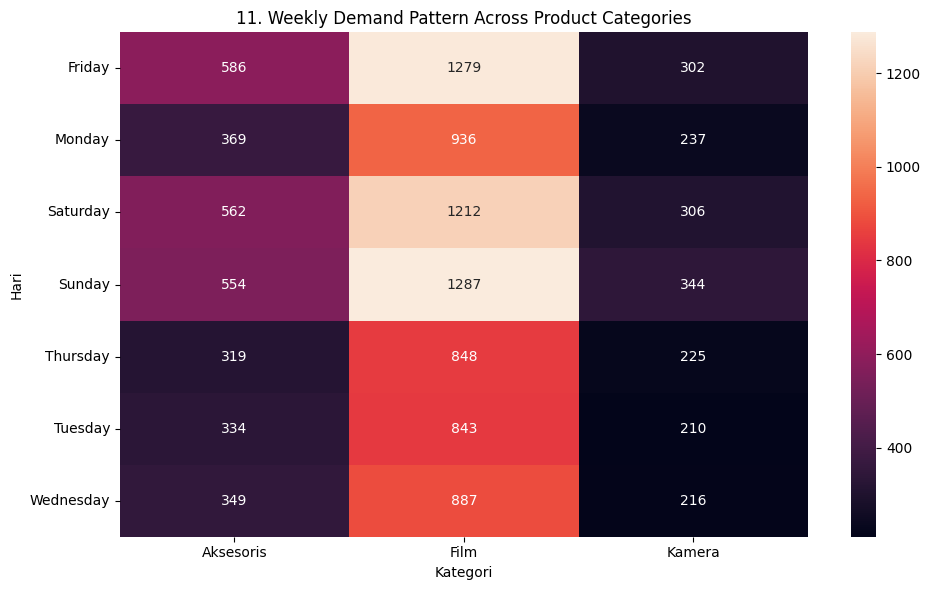

In [24]:
fig = plt.figure(figsize=(10,6))
sns.heatmap(pd.crosstab(df['Hari'], df['Kategori']), annot=True, fmt='d')
plt.title(f'{plot_no}. Weekly Demand Pattern Across Product Categories')
show_fig()
plot_no += 1


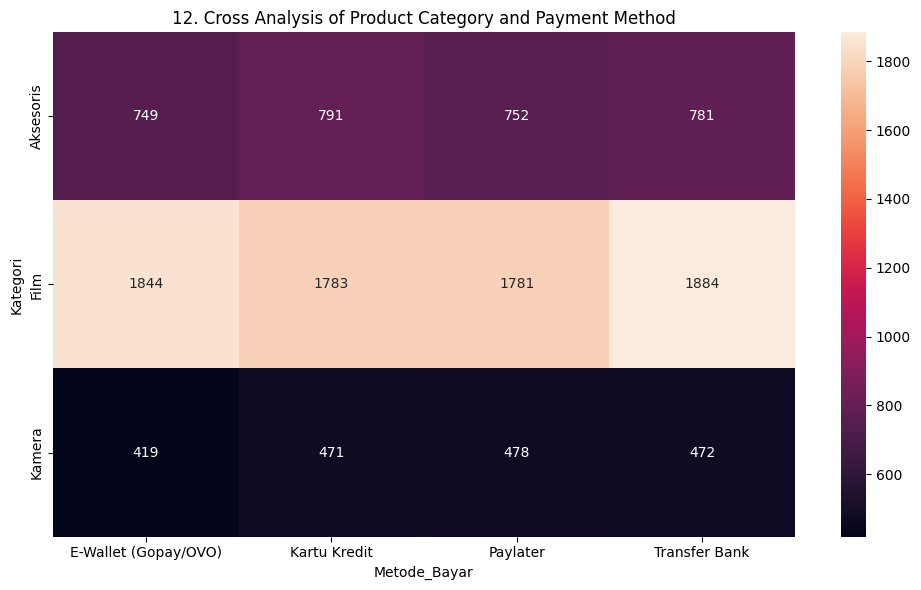

In [25]:
fig = plt.figure(figsize=(10,6))
sns.heatmap(pd.crosstab(df['Kategori'], df['Metode_Bayar']), annot=True, fmt='d')
plt.title(f'{plot_no}. Cross Analysis of Product Category and Payment Method')
show_fig()
plot_no += 1


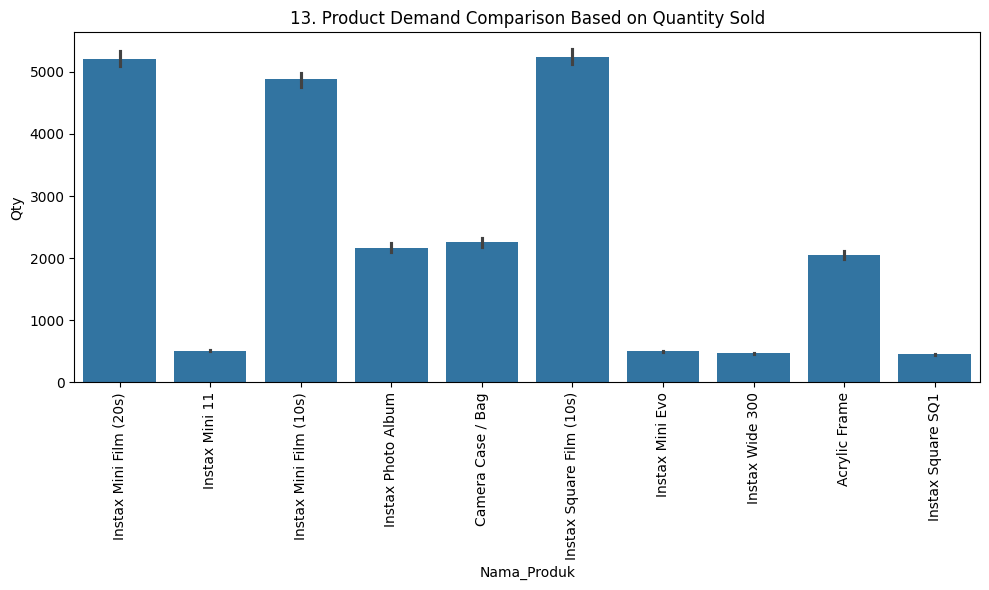

In [26]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='Nama_Produk', y='Qty', data=df, estimator=sum)
plt.title(f'{plot_no}. Product Demand Comparison Based on Quantity Sold')
plt.xticks(rotation=90)
show_fig()
plot_no += 1


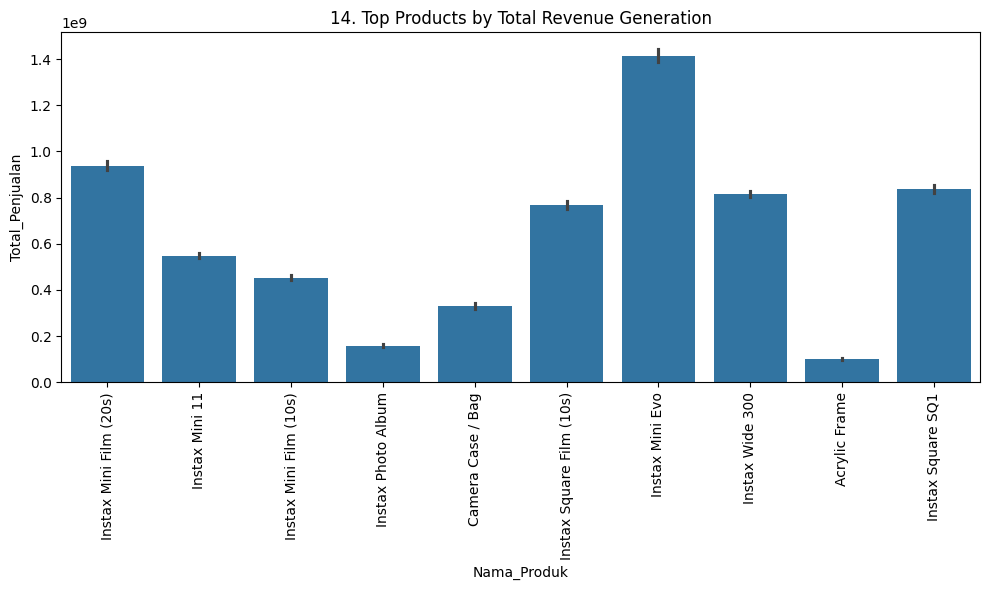

In [27]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='Nama_Produk', y='Total_Penjualan', data=df, estimator=sum)
plt.title(f'{plot_no}. Top Products by Total Revenue Generation')
plt.xticks(rotation=90)
show_fig()
plot_no += 1


# Model Training

## Create Target Variable

In [28]:
df['Sales_Class'] = pd.cut(
    df['Total_Penjualan'],
    bins=[0, 200000, 800000, df['Total_Penjualan'].max()],
    labels=['Low', 'Medium', 'High']
)

## Feature & Target Split

In [29]:
X = df.drop(columns=['Total_Penjualan', 'Sales_Class'])
y = df['Sales_Class']

## Separate Categorical & Numerical Columns

In [30]:
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(exclude='object').columns


## Preprocessing Pipeline

In [31]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols),
        ('num', 'passthrough', num_cols)
    ]
)

## Train-Test Split

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


## Build HIGH-ACCURACY MODEL

In [33]:
model = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(
            n_estimators=300,
            max_depth=None,
            min_samples_split=5,
            random_state=42,
            n_jobs=-1
        ))
    ]
)

## Train Model

In [34]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Tanggal', 'Hari', 'Kategori', 'Nama_Produk', 'Lokasi_Toko',
       'Metode_Bayar'],
      dtype='object')),
                                                 ('num', 'passthrough',
                                                  Index(['Tahun', 'Bulan', 'Harga_Satuan', 'Qty', 'Diskon_IDR'], dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(min_samples_split=5, n_estimators=300,
                                        n_jobs=-1, random_state=42))])

## Predictions

In [35]:
y_pred = model.predict(X_test)

## Evaluation (Accuracy Focus)

In [36]:
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy:", accuracy)

Accuracy: 99.13969684555511


In [37]:
print(f"Model Performance: Accuracy = {accuracy:.2f}%")

Model Performance: Accuracy = 99.14%


## Confusion Matrix

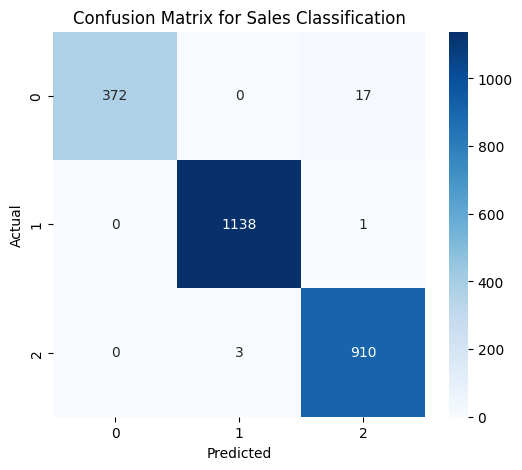

In [38]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Sales Classification')
plt.show()